### Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import torch
from torchvision import datasets, transforms, models  # datsets  , transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as F
from datetime import datetime

In [3]:
# %load_ext nb_black

### Import Dataset

<b> Dataset Link (Plant Vliiage Dataset ):</b><br> <a href='https://data.mendeley.com/datasets/tywbtsjrjv/1'> https://data.mendeley.com/datasets/tywbtsjrjv/1 </a> 

In [4]:
transform = transforms.Compose(
    [transforms.Resize(255), transforms.CenterCrop(224), transforms.ToTensor()]
)

In [5]:
dataset = datasets.ImageFolder("Dataset", transform=transform)

In [6]:
dataset

Dataset ImageFolder
    Number of datapoints: 61486
    Root location: Dataset
    StandardTransform
Transform: Compose(
               Resize(size=255, interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(224, 224))
               ToTensor()
           )

In [7]:
indices = list(range(len(dataset)))

In [8]:
split = int(np.floor(0.85 * len(dataset)))  # train_size

In [9]:
validation = int(np.floor(0.70 * split))  # validation

In [10]:
print(0, validation, split, len(dataset))

0 36584 52263 61486


In [11]:
print(f"length of train size :{validation}")
print(f"length of validation size :{split - validation}")
print(f"length of test size :{len(dataset)-validation}")

length of train size :36584
length of validation size :15679
length of test size :24902


In [12]:
np.random.shuffle(indices)

### Split into Train and Test

In [13]:
train_indices, validation_indices, test_indices = (
    indices[:validation],
    indices[validation:split],
    indices[split:],
)

In [14]:
train_sampler = SubsetRandomSampler(train_indices)
validation_sampler = SubsetRandomSampler(validation_indices)
test_sampler = SubsetRandomSampler(test_indices)

In [15]:
targets_size = len(dataset.class_to_idx)

### Model

<b>Convolution Aithmetic Equation : </b>(W - F + 2P) / S + 1 <br>
W = Input Size<br>
F = Filter Size<br>
P = Padding Size<br>
S = Stride <br>

### Transfer Learning

In [16]:
# model = models.vgg16(pretrained=True)

In [17]:
# for params in model.parameters():
#     params.requires_grad = False

In [18]:
# model

In [19]:
# n_features = model.classifier[0].in_features
# n_features

In [20]:
# model.classifier = nn.Sequential(
#     nn.Linear(n_features, 1024),
#     nn.ReLU(),
#     nn.Dropout(0.4),
#     nn.Linear(1024, targets_size),
# )

In [21]:
# model

### Original Modeling

In [22]:
class CNN(nn.Module):
    def __init__(self, K):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            # conv1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),
            # conv2
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),
            # conv3
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),
            # conv4
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2),
        )

        self.dense_layers = nn.Sequential(
            nn.Dropout(0.4),
            nn.Linear(50176, 1024),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(1024, K),
        )

    def forward(self, X):
        out = self.conv_layers(X)

        # Flatten
        out = out.view(-1, 50176)

        # Fully connected
        out = self.dense_layers(out)

        return out

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [24]:
device = "cpu"

In [25]:
model = CNN(targets_size)

In [26]:
model.to(device)

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

In [27]:
!pip install torchsummary

from torchsummary import summary

summary(model, (3, 224, 224))


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             896
              ReLU-2         [-1, 32, 224, 224]               0
       BatchNorm2d-3         [-1, 32, 224, 224]              64
            Conv2d-4         [-1, 32, 224, 224]           9,248
              ReLU-5         [-1, 32, 224, 224]               0
       BatchNorm2d-6         [-1, 32, 224, 224]              64
         MaxPool2d-7         [-1, 32, 112, 112]               0
            Conv2d-8         [-1, 64, 112, 112]          18,496
              ReLU-9         [-1, 64, 112, 112]               0
      BatchNorm2d-10         [-1, 64, 112, 112]             128
           Conv2d-11         [-1, 64, 112, 112]          36,928
             ReLU-12         [-1, 64, 112, 112]       

In [28]:
criterion = nn.CrossEntropyLoss()  # this include softmax + cross entropy loss
optimizer = torch.optim.Adam(model.parameters())

### Batch Gradient Descent

In [29]:
!pip install tqdm
import numpy as np
from datetime import datetime
from tqdm import tqdm

def batch_gd(model, criterion, train_loader, validation_loader, optimizer, device, epochs):
    train_losses = np.zeros(epochs)
    validation_losses = np.zeros(epochs)

    for e in range(epochs):
        print(f"\nEpoch {e+1}/{epochs}")
        t0 = datetime.now()
        train_loss = []

        # tqdm for training
        for inputs, targets in tqdm(train_loader, desc="Training", leave=False):
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()
            output = model(inputs)
            loss = criterion(output, targets)
            train_loss.append(loss.item())
            loss.backward()
            optimizer.step()

        train_loss = np.mean(train_loss)

        validation_loss = []

        # tqdm for validation
        for inputs, targets in tqdm(validation_loader, desc="Validating", leave=False):
            inputs, targets = inputs.to(device), targets.to(device)
            output = model(inputs)
            loss = criterion(output, targets)
            validation_loss.append(loss.item())

        validation_loss = np.mean(validation_loss)

        train_losses[e] = train_loss
        validation_losses[e] = validation_loss

        dt = datetime.now() - t0
        print(
            f"Epoch: {e+1}/{epochs} | Train Loss: {train_loss:.3f} | Validation Loss: {validation_loss:.3f} | Duration: {dt}"
        )

    return train_losses, validation_losses



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [30]:
device = "cpu"

In [31]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, sampler=train_sampler
)
test_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, sampler=test_sampler
)
validation_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, sampler=validation_sampler
)

In [32]:
train_losses, validation_losses = batch_gd(
    model, criterion, train_loader, validation_loader, optimizer, device, epochs=8
)



Epoch 1/8


Epoch: 1/8 | Train Loss: 2.367 | Validation Loss: 1.484 | Duration: 1:32:29.531677

Epoch 2/8


Epoch: 2/8 | Train Loss: 1.306 | Validation Loss: 1.254 | Duration: 1:21:13.902155

Epoch 3/8


Epoch: 3/8 | Train Loss: 1.074 | Validation Loss: 1.096 | Duration: 1:20:05.780101

Epoch 4/8


Epoch: 4/8 | Train Loss: 0.882 | Validation Loss: 0.825 | Duration: 1:19:41.645460

Epoch 5/8


Epoch: 5/8 | Train Loss: 0.746 | Validation Loss: 0.738 | Duration: 1:19:24.995866

Epoch 6/8


Epoch: 6/8 | Train Loss: 0.638 | Validation Loss: 0.734 | Duration: 1:19:16.983054

Epoch 7/8


Epoch: 7/8 | Train Loss: 0.543 | Validation Loss: 0.602 | Duration: 1:21:19.037139

Epoch 8/8


Epoch: 8/8 | Train Loss: 0.422 | Validation Loss: 0.562 | Duration: 1:29:55.680939


### Save the Model

In [33]:
torch.save(model.state_dict() , 'plant_disease_model_2.pt')

### Load Model

In [34]:
targets_size = 39
model = CNN(targets_size)
model.load_state_dict(torch.load("plant_disease_model_2.pt"))
model.eval()

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

In [35]:
# %matplotlib notebook

### Plot the loss

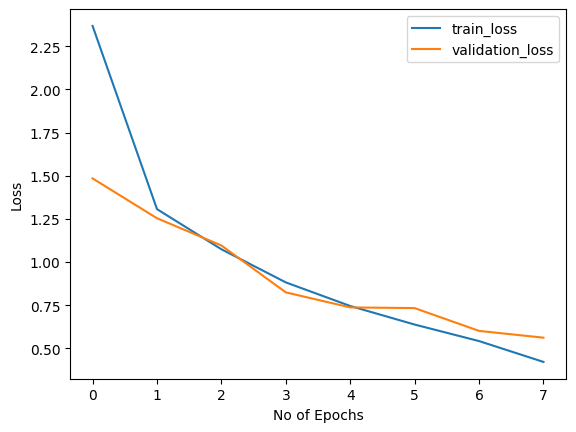

In [36]:
plt.plot(train_losses , label = 'train_loss')
plt.plot(validation_losses , label = 'validation_loss')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Accuracy

In [37]:
def accuracy(loader):
    n_correct = 0
    n_total = 0

    for inputs, targets in loader:
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = model(inputs)

        _, predictions = torch.max(outputs, 1)

        n_correct += (predictions == targets).sum().item()
        n_total += targets.shape[0]

    acc = n_correct / n_total
    return acc

In [38]:
train_acc = accuracy(train_loader)
test_acc = accuracy(test_loader)
validation_acc = accuracy(validation_loader)

In [39]:
print(
    f"Train Accuracy : {train_acc}\nTest Accuracy : {test_acc}\nValidation Accuracy : {validation_acc}"
)

Train Accuracy : 0.9535315985130112
Test Accuracy : 0.9206331996096715
Validation Accuracy : 0.9237196249760826


### Single Image Prediction

In [40]:
transform_index_to_disease = dataset.class_to_idx

In [41]:
transform_index_to_disease = dict(
    [(value, key) for key, value in transform_index_to_disease.items()]
)  # reverse the index

In [42]:
data = pd.read_csv("disease_info.csv", encoding="cp1252")

In [43]:
from PIL import Image
import torchvision.transforms.functional as TF

In [44]:
def single_prediction(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))
    input_data = TF.to_tensor(image)
    input_data = input_data.view((-1, 3, 224, 224))
    output = model(input_data)
    output = output.detach().numpy()
    index = np.argmax(output)
    print("Original : ", image_path[12:-4])
    pred_csv = data["disease_name"][index]
    print(pred_csv)

In [45]:
single_prediction("test_images/Apple_ceder_apple_rust.JPG")

Original :  Apple_ceder_apple_rust
Apple : Cedar rust


### Wrong Prediction

In [46]:
single_prediction("test_images/Apple_scab.JPG")

Original :  Apple_scab
Apple : Scab


In [47]:
single_prediction("test_images/Grape_esca.JPG")

Original :  Grape_esca
Grape : Esca | Black Measles


In [48]:
single_prediction("test_images/apple_black_rot.JPG")

Original :  apple_black_rot
Apple : Black Rot


In [49]:
single_prediction("test_images/apple_healthy.JPG")

Original :  apple_healthy
Apple : Healthy


In [50]:
single_prediction("test_images/background_without_leaves.jpg")

Original :  background_without_leaves
Background Without Leaves


In [51]:
single_prediction("test_images/blueberry_healthy.JPG")

Original :  blueberry_healthy
Blueberry : Healthy


In [52]:
single_prediction("test_images/cherry_healthy.JPG")

Original :  cherry_healthy
Cherry : Healthy


In [53]:
single_prediction("test_images/cherry_powdery_mildew.JPG")

Original :  cherry_powdery_mildew
Cherry : Powdery Mildew


In [54]:
single_prediction("test_images/corn_cercospora_leaf.JPG")

Original :  corn_cercospora_leaf
Corn : Cercospora Leaf Spot | Gray Leaf Spot


In [55]:
single_prediction("test_images/corn_common_rust.JPG")

Original :  corn_common_rust
Corn : Common Rust


In [56]:
single_prediction("test_images/corn_healthy.jpg")

Original :  corn_healthy
Corn : Healthy


In [57]:
single_prediction("test_images/corn_northen_leaf_blight.JPG")

Original :  corn_northen_leaf_blight
Corn : Northern Leaf Blight


In [58]:
single_prediction("test_images/grape_black_rot.JPG")

Original :  grape_black_rot
Grape : Black Rot


In [59]:
single_prediction("test_images/grape_healthy.JPG")

Original :  grape_healthy
Soybean : Healthy


In [60]:
single_prediction("test_images/grape_leaf_blight.JPG")

Original :  grape_leaf_blight
Grape : Black Rot


In [61]:
single_prediction("test_images/orange_haunglongbing.JPG")

Original :  orange_haunglongbing
Orange : Haunglongbing | Citrus Greening


In [62]:
single_prediction("test_images/peach_bacterial_spot.JPG")

Original :  peach_bacterial_spot
Peach : Bacterial Spot


In [63]:
single_prediction("test_images/peach_healthy.JPG")

Original :  peach_healthy
Peach : Healthy


In [64]:
single_prediction("test_images/pepper_bacterial_spot.JPG")

Original :  pepper_bacterial_spot
Pepper bell : Bacterial Spot


In [65]:
single_prediction("test_images/pepper_bell_healthy.JPG")

Original :  pepper_bell_healthy
Pepper bell : Healthy


In [66]:
single_prediction("test_images/potato_early_blight.JPG")

Original :  potato_early_blight
Potato : Early Blight


In [67]:
single_prediction("test_images/potato_healthy.JPG")

Original :  potato_healthy
Potato : Healthy


In [68]:
single_prediction("test_images/potato_late_blight.JPG")

Original :  potato_late_blight
Potato : Late Blight


In [69]:
single_prediction("test_images/raspberry_healthy.JPG")

Original :  raspberry_healthy
Pepper bell : Healthy


In [70]:
single_prediction("test_images/soyaben healthy.JPG")

Original :  soyaben healthy
Soybean : Healthy


In [71]:
single_prediction("test_images/potato_late_blight.JPG")

Original :  potato_late_blight
Potato : Late Blight


In [72]:
single_prediction("test_images/squash_powdery_mildew.JPG")

Original :  squash_powdery_mildew
Squash : Powdery Mildew


In [73]:
single_prediction("test_images/starwberry_healthy.JPG")

Original :  starwberry_healthy
Strawberry : Healthy


In [74]:
single_prediction("test_images/starwberry_leaf_scorch.JPG")

Original :  starwberry_leaf_scorch
Tomato : Septoria Leaf Spot


In [75]:
single_prediction("test_images/tomato_bacterial_spot.JPG")

Original :  tomato_bacterial_spot
Tomato : Bacterial Spot


In [76]:
single_prediction("test_images/tomato_early_blight.JPG")

Original :  tomato_early_blight
Tomato : Early Blight


In [77]:
single_prediction("test_images/tomato_healthy.JPG")

Original :  tomato_healthy
Tomato : Healthy


In [78]:
single_prediction("test_images/tomato_late_blight.JPG")

Original :  tomato_late_blight
Tomato : Late Blight


In [79]:
single_prediction("test_images/tomato_leaf_mold.JPG")

Original :  tomato_leaf_mold
Tomato : Leaf Mold


In [80]:
single_prediction("test_images/tomato_mosaic_virus.JPG")

Original :  tomato_mosaic_virus
Tomato : Mosaic Virus


In [81]:
single_prediction("test_images/tomato_septoria_leaf_spot.JPG")

Original :  tomato_septoria_leaf_spot
Tomato : Septoria Leaf Spot


In [82]:
single_prediction("test_images/tomato_spider_mites_two_spotted_spider_mites.JPG")

Original :  tomato_spider_mites_two_spotted_spider_mites
Tomato : Spider Mites | Two-Spotted Spider Mite


In [83]:
single_prediction("test_images/tomato_target_spot.JPG")

Original :  tomato_target_spot
Tomato : Target Spot


In [84]:
single_prediction("test_images/tomato_yellow_leaf_curl_virus.JPG")

Original :  tomato_yellow_leaf_curl_virus
Tomato : Yellow Leaf Curl Virus



Original: test_images/Apple_ceder_apple_rust.JPG
Predicted Label: Apple___Cedar_apple_rust
Disease Name: Apple : Cedar rust
Confidence Score: 99.92%


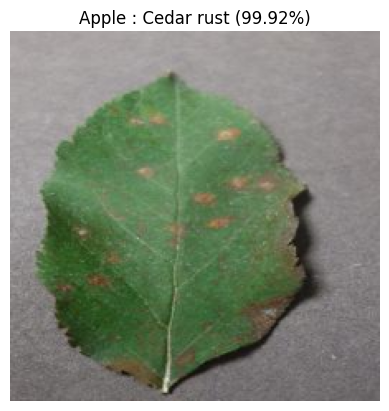

In [85]:
from PIL import Image
import torch
import numpy as np
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt

# Reverse mapping from index to class name
transform_index_to_disease = {v: k for k, v in dataset.class_to_idx.items()}

def single_prediction(image_path):
    image = Image.open(image_path).convert("RGB")
    image = image.resize((224, 224))
    input_data = TF.to_tensor(image).unsqueeze(0)  # (1, 3, 224, 224)

    with torch.no_grad():
        output = model(input_data)
        output = torch.softmax(output, dim=1)
        output_np = output.numpy()[0]
        index = np.argmax(output_np)
        confidence = output_np[index]

    pred_label = transform_index_to_disease[index]
    pred_csv = data["disease_name"][index]

    print(f"\nOriginal: {image_path}")
    print(f"Predicted Label: {pred_label}")
    print(f"Disease Name: {pred_csv}")
    print(f"Confidence Score: {confidence * 100:.2f}%")

    plt.imshow(image)
    plt.title(f"{pred_csv} ({confidence * 100:.2f}%)")
    plt.axis('off')
    plt.show()

# Example usage
single_prediction("test_images/Apple_ceder_apple_rust.JPG")


In [86]:

!pip install scikit-learn
from sklearn.metrics import classification_report
import torch
import torch.nn.functional as F

# Make sure your model is in eval mode
model.eval()

y_true = []
y_pred = []

# Loop through the test set
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to("cpu"), labels.to("cpu")
        outputs = model(images)
        probs = F.softmax(outputs, dim=1)
        preds = torch.argmax(probs, dim=1)

        y_true.extend(labels.numpy())
        y_pred.extend(preds.numpy())

# Convert index to class name using the reverse map
target_names = [transform_index_to_disease[i] for i in sorted(transform_index_to_disease.keys())]

# Print classification report
print(classification_report(y_true, y_pred, target_names=target_names))



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
                                               precision    recall  f1-score   support

                           Apple___Apple_scab       0.96      0.71      0.81       154
                            Apple___Black_rot       0.89      0.89      0.89       148
                     Apple___Cedar_apple_rust       0.99      0.96      0.97       138
                              Apple___healthy       0.84      0.89      0.86       240
                    Background_without_leaves       0.97      0.94      0.96       196
                          Blueberry___healthy       0.91      0.98      0.95       222
                      Cherry___Powdery_mildew       0.96      0.96      0.96       157
                             Cherry___healthy       0.90      0.94      0.92       168
   Corn___Cercospora_leaf_spot Gray_leaf_spot       0.70      0.93      0.80       147
                


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


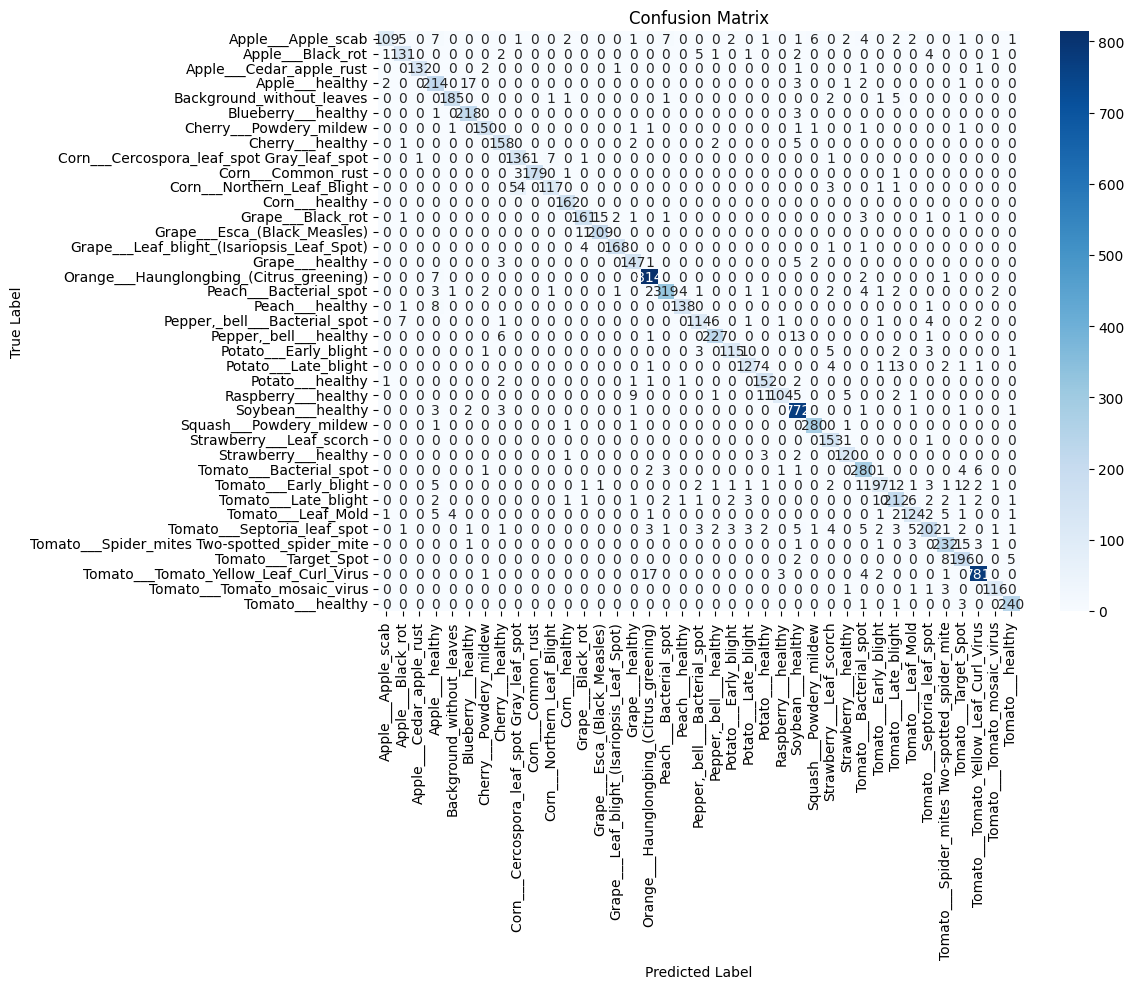

In [88]:
!pip install seaborn
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Class names (make sure they're in the correct order)
class_names = [transform_index_to_disease[i] for i in sorted(transform_index_to_disease.keys())]

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


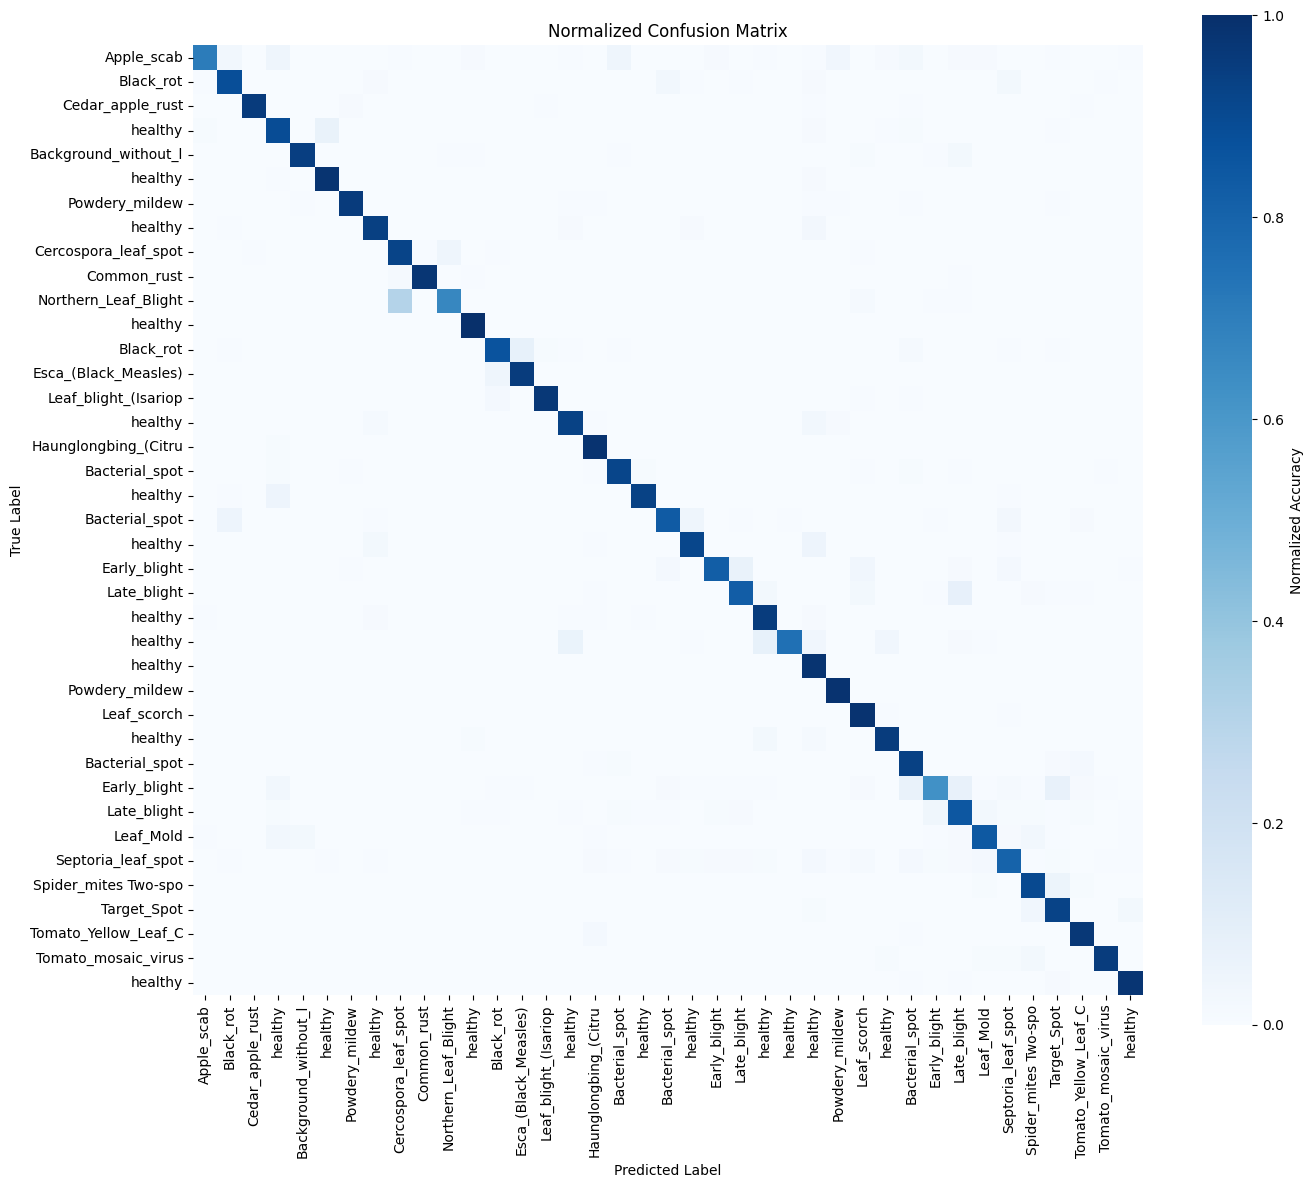

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute confusion matrix and normalize it (per row)
cm = confusion_matrix(y_true, y_pred, normalize='true')

# Class names (abbreviate if too long)
class_names = [transform_index_to_disease[i] for i in sorted(transform_index_to_disease.keys())]

# Optionally shorten long class names to prevent crowding
short_names = [name.split("___")[-1][:20] for name in class_names]  # last part & truncate

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=short_names, yticklabels=short_names,
            cbar_kws={'label': 'Normalized Accuracy'}, square=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
